# Sample codes for Regression and Classification problems

## Important libraries to import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution1D, Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# Forcing it to use theono as the backend
from keras import backend as K
K.set_image_dim_ordering('th')

np.random.seed(1234)

Using Theano backend.


## To display the neural network

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
def plot_model(thismodel):
    SVG(model_to_dot(thismodel).create(prog='dot', format='svg'))

# Regression problem:

## Loading datasets and splitting it into training and test set

In [3]:
filename = "/Users/mohammed/Dropbox/fermilabwork/with_myself/photoredshifts/data/CMASS_50features_irshad.csv"
dataframe = pandas.read_csv(filename)
dataset = dataframe.values

nCol = 50
nn = int(len(dataset)*2/3)
X_train = dataset[:nn,1:nCol+1]
Y_train = dataset[:nn,nCol+1]
X_test = dataset[nn:,1:nCol+1]
Y_test = dataset[nn:,nCol+1]

print("Shape of X-train: {}".format(X_train.shape))
print("Shape of Y-train: {}".format(Y_train.shape))
print("Shape of X-test: {}".format(X_test.shape))
print("Shape of Y-test: {}".format(Y_test.shape))

Shape of X-train:  (435934, 50)
Shape of Y-train:  (435934,)
Shape of X-test:  (217967, 50)
Shape of Y-test:  (217967,)


## Sample of a fully connected architecture for regression

In [6]:
model = Sequential()
model.add(Dense(nCol, input_dim=X_train.shape[1], init='normal', activation='relu'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, init='normal'))
print model.summary()
model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 50)            2550        dense_input_3[0][0]              
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 256)           13056       dense_7[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 256)           65792       dense_8[0][0]                    
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 1)             257         dense_9[0][0]                    
Total params: 81,655
Trainable params: 81,655
Non-trainable params: 0
_____________________

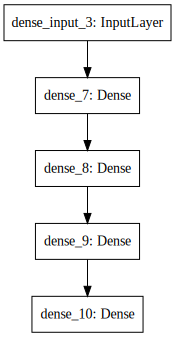

In [7]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))